# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

# **Reading File**

In [ ]:
df=pd.read_csv("cancerdata.csv")
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,0.006422,1.615280,2.763911,153.40,0.007540,0.028043,0.05373,0.015870,0.027044,0.003133,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,0.303622,1.171764,6.690985,74.08,0.003675,0.019118,0.01860,0.013400,0.021795,0.000128,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,0.289027,-0.546491,5.660769,94.03,0.009390,0.035186,0.03832,0.020580,0.020481,0.004616,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,0.765715,0.842057,-0.081625,27.23,0.006981,-0.028741,0.05661,0.018670,0.014801,0.003431,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,0.732142,1.830999,2.432024,94.44,0.006293,0.020667,0.05688,0.018850,0.026821,0.005654,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483
5,843786,M,14.084106,26.364901,82.57,477.1,0.116931,-0.010905,0.045666,0.072498,0.227180,0.065421,0.322909,1.599247,5.513125,27.19,0.006654,0.046030,0.03672,0.011370,0.010786,0.001532,15.47,23.75,103.40,741.6,0.1791,0.365008,0.5355,0.155545,0.3985,0.057922
6,844359,M,15.199230,23.912798,119.60,1040.0,0.085277,0.135089,0.054003,0.000230,0.179330,0.065234,0.031699,1.869043,3.183762,53.91,0.003874,-0.002957,0.02254,0.010390,0.014651,0.002918,22.88,27.66,153.20,1606.0,0.1442,0.132926,0.3784,0.031519,0.3063,0.079428
7,84458202,M,15.542603,15.964994,90.20,577.9,0.106318,0.152953,0.242739,-0.030635,0.204175,0.058607,0.228232,0.754910,4.397724,50.96,0.009780,0.035366,0.02488,0.014480,0.009447,-0.001629,17.06,28.14,110.60,897.0,0.1654,0.388596,0.2678,0.085846,0.3196,0.082534
8,844981,M,15.087924,15.125671,87.50,519.8,0.095879,0.046530,-0.093628,-0.009774,0.205168,0.068256,0.163806,1.763019,-0.439781,24.32,0.003887,0.022873,0.03553,0.012260,0.025836,0.003495,15.49,30.73,106.20,739.3,0.1703,0.315621,0.5390,0.107188,0.4378,0.095350
9,84501001,M,15.150892,18.319345,83.97,475.9,0.110456,0.012679,0.028059,-0.001305,0.194958,0.077700,0.169951,1.017084,-0.871862,23.94,0.009092,-0.003894,0.07743,0.014320,0.021242,-0.000398,15.09,40.68,97.65,711.4,0.1853,0.241266,1.1050,0.197198,0.4366,0.072885


In [ ]:
df.tail(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
549,923465,B,16.239968,20.271783,68.89,361.6,0.115152,0.089705,-0.033294,0.031500,0.177580,0.063488,0.796002,1.633713,-0.801816,33.00,0.000701,0.039278,0.012770,0.005917,0.024842,0.002347,13.030,31.45,83.90,505.6,0.12040,0.215973,0.06194,0.155685,0.3059,0.067234
550,923748,B,12.626257,11.089102,68.51,360.5,0.111650,0.146207,0.131664,0.097925,0.207452,0.061991,0.514999,0.293981,1.608315,20.67,0.008339,0.046781,0.000000,0.000000,0.000978,0.002799,11.660,24.77,74.08,412.3,0.10010,0.407827,0.00000,0.070987,0.2458,0.094688
551,923780,B,15.032612,21.738459,71.49,378.4,0.103963,0.168454,0.119294,0.106041,0.176059,0.060993,0.308505,2.241804,1.039862,17.85,0.007045,0.010563,0.034450,0.010240,0.011638,0.003680,12.020,28.26,77.80,436.6,0.10870,0.307182,0.15640,0.186120,0.3169,0.056448
552,924084,B,7.438708,24.075543,81.35,507.9,0.080150,0.028167,0.126339,0.119676,0.181614,0.071008,-0.161963,1.083644,4.034880,18.76,0.013064,0.039546,0.013280,0.009305,0.021301,0.007476,13.870,36.00,88.10,594.7,0.12340,0.381032,0.08653,0.061115,0.2407,0.076744
553,924342,B,12.570755,12.510447,59.01,264.0,0.098671,0.084857,0.048547,0.061727,0.189604,0.049795,0.417037,1.442228,1.027061,17.86,0.008371,0.007159,0.039960,0.012820,0.012111,0.000655,9.845,25.05,62.86,295.8,0.11030,0.130946,0.07993,0.285147,0.2435,0.073692
554,924632,B,10.253154,17.696794,82.50,514.3,0.096460,0.124067,0.068674,0.005667,0.137356,0.075437,0.313652,0.612720,2.500938,16.83,0.004732,0.036492,0.038980,0.007620,0.028071,0.004625,13.890,35.74,88.84,595.7,0.12270,0.405508,0.24390,-0.002017,0.2372,0.118373
555,924934,B,16.340304,21.071250,65.67,321.4,0.086779,0.122378,0.064949,0.109396,0.154423,0.051531,0.322315,0.803059,1.290277,14.46,0.007511,0.029466,0.048040,0.017210,0.029305,0.007761,10.840,34.91,69.57,357.6,0.13840,0.240283,0.20000,-0.045911,0.2226,0.059663
556,924964,B,13.934195,19.334325,64.73,311.7,0.108710,0.136749,0.116869,0.060429,0.199063,0.074856,0.175384,1.174551,4.281371,16.80,0.005798,0.025699,0.004174,0.007082,0.015143,-0.001121,10.650,22.88,67.88,347.3,0.12650,0.341363,0.01005,0.081016,0.2262,0.115844
557,925236,B,9.900256,21.906205,59.26,271.3,0.086775,0.073215,0.150656,0.038948,0.201070,0.064263,0.624087,1.130618,2.582018,29.11,0.005545,0.057194,0.000000,0.000000,0.001368,0.005828,10.490,34.24,66.50,330.6,0.10730,0.082517,0.00000,0.142030,0.2475,0.087823
558,925277,B,11.441142,21.855801,96.39,657.1,0.092844,0.130587,0.144617,-0.043104,0.186646,0.061162,0.014932,1.408594,5.778763,19.54,0.007874,0.029448,0.065780,0.016060,0.019493,0.008272,15.480,27.27,105.90,733.5,0.10260,0.333202,0.36620,0.065979,0.2258,0.071461


# **Getting dataframe shapes**

In [ ]:
df.shape

(569, 32)

In [ ]:
# Checking each column count

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Checking for any null value

df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_wors           0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# **Removing unrequired column named as "id"**

In [ ]:
df=df.drop(["id"],axis=1)

df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,0.006422,1.615280,2.763911,153.40,0.007540,0.028043,0.05373,0.01587,0.027044,0.003133,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,0.303622,1.171764,6.690985,74.08,0.003675,0.019118,0.01860,0.01340,0.021795,0.000128,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,0.289027,-0.546491,5.660769,94.03,0.009390,0.035186,0.03832,0.02058,0.020481,0.004616,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,0.765715,0.842057,-0.081625,27.23,0.006981,-0.028741,0.05661,0.01867,0.014801,0.003431,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,0.732142,1.830999,2.432024,94.44,0.006293,0.020667,0.05688,0.01885,0.026821,0.005654,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483
5,M,14.084106,26.364901,82.57,477.1,0.116931,-0.010905,0.045666,0.072498,0.227180,0.065421,0.322909,1.599247,5.513125,27.19,0.006654,0.046030,0.03672,0.01137,0.010786,0.001532,15.47,23.75,103.40,741.6,0.1791,0.365008,0.5355,0.155545,0.3985,0.057922
6,M,15.199230,23.912798,119.60,1040.0,0.085277,0.135089,0.054003,0.000230,0.179330,0.065234,0.031699,1.869043,3.183762,53.91,0.003874,-0.002957,0.02254,0.01039,0.014651,0.002918,22.88,27.66,153.20,1606.0,0.1442,0.132926,0.3784,0.031519,0.3063,0.079428
7,M,15.542603,15.964994,90.20,577.9,0.106318,0.152953,0.242739,-0.030635,0.204175,0.058607,0.228232,0.754910,4.397724,50.96,0.009780,0.035366,0.02488,0.01448,0.009447,-0.001629,17.06,28.14,110.60,897.0,0.1654,0.388596,0.2678,0.085846,0.3196,0.082534
8,M,15.087924,15.125671,87.50,519.8,0.095879,0.046530,-0.093628,-0.009774,0.205168,0.068256,0.163806,1.763019,-0.439781,24.32,0.003887,0.022873,0.03553,0.01226,0.025836,0.003495,15.49,30.73,106.20,739.3,0.1703,0.315621,0.5390,0.107188,0.4378,0.095350
9,M,15.150892,18.319345,83.97,475.9,0.110456,0.012679,0.028059,-0.001305,0.194958,0.077700,0.169951,1.017084,-0.871862,23.94,0.009092,-0.003894,0.07743,0.01432,0.021242,-0.000398,15.09,40.68,97.65,711.4,0.1853,0.241266,1.1050,0.197198,0.4366,0.072885


In [ ]:
df.tail(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,B,18.883604,20.403694,74.52,403.5,0.088570,0.173334,0.110262,0.044449,0.166811,0.067633,0.863585,0.558859,1.382524,16.97,0.006456,0.040516,0.05738,0.01267,0.027098,0.004401,12.480,37.16,82.28,474.2,0.12980,0.183338,0.3630,0.048739,0.2112,0.104210
560,B,15.641587,19.106564,91.38,600.4,0.096971,0.082979,0.092175,-0.026195,0.170362,0.059655,-0.181313,0.237462,1.314015,29.84,0.001141,0.049689,0.02071,0.01626,0.012428,0.010218,15.300,33.17,100.20,706.7,0.12410,0.153595,0.1326,0.091074,0.2250,0.085812
561,B,13.914248,18.551161,70.67,386.0,0.104688,0.038765,0.059363,0.051250,0.189823,0.053532,0.601316,0.779023,7.958567,22.81,0.006766,0.063224,0.00000,0.00000,0.013289,0.006973,11.920,38.30,75.19,439.6,0.09267,0.248033,0.0000,0.106989,0.1566,0.067225
562,M,15.362088,23.395916,103.40,716.9,0.096347,0.216130,0.062905,0.046674,0.231600,0.067663,0.486191,1.289273,5.729188,22.65,0.007602,0.033623,0.07359,0.01608,0.024258,0.003416,17.520,42.79,128.70,915.0,0.14170,0.329496,1.1700,0.153819,0.4089,0.083204
563,M,9.989657,14.959439,143.00,1347.0,0.095120,0.223011,0.108771,0.029735,0.178534,0.075815,0.588595,1.316083,0.851475,118.80,0.004843,0.035800,0.07845,0.02624,0.021973,0.007267,24.290,29.41,179.10,1819.0,0.14070,0.242927,0.6599,0.024528,0.2929,0.053509
564,M,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,0.157627,0.061794,0.505060,0.566071,1.972287,158.70,0.005673,0.009436,0.05198,0.02454,0.020836,0.005456,25.450,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780
565,M,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,0.208220,0.073724,0.522778,1.110313,4.025630,99.04,0.009236,0.027082,0.03950,0.01678,0.012430,-0.000019,23.690,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449
566,M,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,0.211039,0.061090,0.628936,1.107104,1.943147,48.55,0.008076,-0.002990,0.04730,0.01557,0.014103,0.007739,18.980,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450
567,M,16.206551,19.616466,140.10,1265.0,0.112486,0.158756,0.096860,0.024182,0.151310,0.066581,0.338542,0.822432,2.288387,86.22,0.007873,0.029954,0.07117,0.01664,0.009220,0.006787,25.740,39.42,184.60,1821.0,0.16500,0.116461,0.9387,0.067784,0.4087,0.074609
568,B,13.256191,25.087474,47.92,181.0,0.110289,0.044248,-0.072171,0.029954,0.156980,0.060564,0.615921,0.917139,1.970200,19.15,0.008049,0.039570,0.00000,0.00000,0.006132,0.008352,9.456,30.37,59.16,268.6,0.08996,0.389369,0.0000,0.192663,0.2871,0.062577


In [ ]:
# Parsing through the column heading

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# **Converting object type column to integer type column**

In [ ]:
df["diagnosis"] = df["diagnosis"].map({'B':1, 'M':0}).astype(int)
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,0.006422,1.615280,2.763911,153.40,0.007540,0.028043,0.05373,0.01587,0.027044,0.003133,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,0,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,0.303622,1.171764,6.690985,74.08,0.003675,0.019118,0.01860,0.01340,0.021795,0.000128,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,0,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,0.289027,-0.546491,5.660769,94.03,0.009390,0.035186,0.03832,0.02058,0.020481,0.004616,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,0,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,0.765715,0.842057,-0.081625,27.23,0.006981,-0.028741,0.05661,0.01867,0.014801,0.003431,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,0,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,0.732142,1.830999,2.432024,94.44,0.006293,0.020667,0.05688,0.01885,0.026821,0.005654,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483
5,0,14.084106,26.364901,82.57,477.1,0.116931,-0.010905,0.045666,0.072498,0.227180,0.065421,0.322909,1.599247,5.513125,27.19,0.006654,0.046030,0.03672,0.01137,0.010786,0.001532,15.47,23.75,103.40,741.6,0.1791,0.365008,0.5355,0.155545,0.3985,0.057922
6,0,15.199230,23.912798,119.60,1040.0,0.085277,0.135089,0.054003,0.000230,0.179330,0.065234,0.031699,1.869043,3.183762,53.91,0.003874,-0.002957,0.02254,0.01039,0.014651,0.002918,22.88,27.66,153.20,1606.0,0.1442,0.132926,0.3784,0.031519,0.3063,0.079428
7,0,15.542603,15.964994,90.20,577.9,0.106318,0.152953,0.242739,-0.030635,0.204175,0.058607,0.228232,0.754910,4.397724,50.96,0.009780,0.035366,0.02488,0.01448,0.009447,-0.001629,17.06,28.14,110.60,897.0,0.1654,0.388596,0.2678,0.085846,0.3196,0.082534
8,0,15.087924,15.125671,87.50,519.8,0.095879,0.046530,-0.093628,-0.009774,0.205168,0.068256,0.163806,1.763019,-0.439781,24.32,0.003887,0.022873,0.03553,0.01226,0.025836,0.003495,15.49,30.73,106.20,739.3,0.1703,0.315621,0.5390,0.107188,0.4378,0.095350
9,0,15.150892,18.319345,83.97,475.9,0.110456,0.012679,0.028059,-0.001305,0.194958,0.077700,0.169951,1.017084,-0.871862,23.94,0.009092,-0.003894,0.07743,0.01432,0.021242,-0.000398,15.09,40.68,97.65,711.4,0.1853,0.241266,1.1050,0.197198,0.4366,0.072885


In [ ]:
df.tail(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,1,18.883604,20.403694,74.52,403.5,0.088570,0.173334,0.110262,0.044449,0.166811,0.067633,0.863585,0.558859,1.382524,16.97,0.006456,0.040516,0.05738,0.01267,0.027098,0.004401,12.480,37.16,82.28,474.2,0.12980,0.183338,0.3630,0.048739,0.2112,0.104210
560,1,15.641587,19.106564,91.38,600.4,0.096971,0.082979,0.092175,-0.026195,0.170362,0.059655,-0.181313,0.237462,1.314015,29.84,0.001141,0.049689,0.02071,0.01626,0.012428,0.010218,15.300,33.17,100.20,706.7,0.12410,0.153595,0.1326,0.091074,0.2250,0.085812
561,1,13.914248,18.551161,70.67,386.0,0.104688,0.038765,0.059363,0.051250,0.189823,0.053532,0.601316,0.779023,7.958567,22.81,0.006766,0.063224,0.00000,0.00000,0.013289,0.006973,11.920,38.30,75.19,439.6,0.09267,0.248033,0.0000,0.106989,0.1566,0.067225
562,0,15.362088,23.395916,103.40,716.9,0.096347,0.216130,0.062905,0.046674,0.231600,0.067663,0.486191,1.289273,5.729188,22.65,0.007602,0.033623,0.07359,0.01608,0.024258,0.003416,17.520,42.79,128.70,915.0,0.14170,0.329496,1.1700,0.153819,0.4089,0.083204
563,0,9.989657,14.959439,143.00,1347.0,0.095120,0.223011,0.108771,0.029735,0.178534,0.075815,0.588595,1.316083,0.851475,118.80,0.004843,0.035800,0.07845,0.02624,0.021973,0.007267,24.290,29.41,179.10,1819.0,0.14070,0.242927,0.6599,0.024528,0.2929,0.053509
564,0,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,0.157627,0.061794,0.505060,0.566071,1.972287,158.70,0.005673,0.009436,0.05198,0.02454,0.020836,0.005456,25.450,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780
565,0,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,0.208220,0.073724,0.522778,1.110313,4.025630,99.04,0.009236,0.027082,0.03950,0.01678,0.012430,-0.000019,23.690,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449
566,0,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,0.211039,0.061090,0.628936,1.107104,1.943147,48.55,0.008076,-0.002990,0.04730,0.01557,0.014103,0.007739,18.980,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450
567,0,16.206551,19.616466,140.10,1265.0,0.112486,0.158756,0.096860,0.024182,0.151310,0.066581,0.338542,0.822432,2.288387,86.22,0.007873,0.029954,0.07117,0.01664,0.009220,0.006787,25.740,39.42,184.60,1821.0,0.16500,0.116461,0.9387,0.067784,0.4087,0.074609
568,1,13.256191,25.087474,47.92,181.0,0.110289,0.044248,-0.072171,0.029954,0.156980,0.060564,0.615921,0.917139,1.970200,19.15,0.008049,0.039570,0.00000,0.00000,0.006132,0.008352,9.456,30.37,59.16,268.6,0.08996,0.389369,0.0000,0.192663,0.2871,0.062577


In [ ]:
# Checking data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# Initializing parameters to be considered as into predictors and results as "x" and "y" respectively 

x = df.drop(labels='diagnosis',axis=1)
y = df[['diagnosis']]

In [ ]:
# Splitting training and test into 80:20 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# Creating KNN model

model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

# **Accuracy**

In [ ]:
# Training Accuracy

train_accuracy = model.score(x_train, y_train)*100
train_accuracy = round(train_accuracy, 2)

print("Training Accuracy : ", train_accuracy)

Training Accuracy :  93.41


In [ ]:
# Testing Accuracy

test_accuracy = model.score(x_test,y_test)*100
test_accuracy = round(test_accuracy, 2)

print("Testing Accuracy : ", test_accuracy)

Testing Accuracy :  94.74


# **Confusion Matrix and Other Parameters**

In [ ]:
y_pred_cm = model.predict(x_test)
print("y_pred_cm : \n", y_pred_cm)
cmat = confusion_matrix(y_test, y_pred_cm)
tn, fp, fn, tp = cmat[0,0], cmat[0,1], cmat[1,0], cmat[1,1]
print ("Confusion Matrix : \n", cmat)
print('True Negarive  - ', tn)
print('False Positve  - ', fp)
print('False Negative - ', fn)
print('True Positive  - ', tp)

y_pred_cm : 
 [0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1]
Confusion Matrix : 
 [[38  4]
 [ 2 70]]
True Negarive  -  38
False Positve  -  4
False Negative -  2
True Positive  -  70


In [ ]:
precision = tp/(tp+fp)
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
recall = tp/(fn+tp)
f1score = (2*precision*recall)/(precision+recall)

precision = round(precision*100, 2)
sensitivity = round(sensitivity*100, 2)
specificity = round(specificity*100, 2)
recall = round(recall*100, 2)
f1score = round(f1score*100, 2)

print("Precision    :  ", precision)
print("Sensitivity  :  ", sensitivity)
print("Specificity  :  ", specificity)
print("Recall       :  ", recall)
print("F1 Score     :  ", f1score)

Precision    :   94.59
Sensitivity  :   97.22
Specificity  :   90.48
Recall       :   97.22
F1 Score     :   95.89


# **AUC Curve**

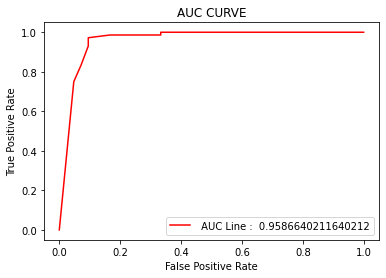

In [ ]:
# Plotting AUC Curve  

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='r', label = ' AUC Line :  ' + str(auc))
plt.legend()
plt.title("AUC CURVE")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()